<a href="https://colab.research.google.com/github/Kyoungjinny/AI_PredictionModel/blob/predict/AI_%EC%84%9C%EC%9A%B8%EB%8C%80%EA%B3%B5%EC%9B%90_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data2005_2014.csv to data2005_2014 (2).csv


In [0]:
import pandas as pd
import numpy as np

In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['data2005_2014.csv']))

# Modeling

In [0]:
from sklearn.model_selection import train_test_split

y = data.pop('m_total')
X = data

X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)
X.iloc[X_train] # return dataframe train

,10분 최다 강수량(mm),1시간 최다강수량(mm),break_summer,break_winter,cloud,cloud_w,date_fri,date_mon,date_sat,date_sun,date_thur,date_tue,date_wed,fall,humid,humid_w,rain,spring,summer,temp,temp_w,when,wind,wind_w,winter,강수 계속시간(hr),일강수량(mm)
407,0.0,0.0,0.0,0.0,4.0,2.0,0,1,0,0,0,0,0,1.0,69.9,5.0,0.0,0,0.0,15.2,4.0,2018-10-15,1.4,1.0,0,0.00,0.0
533,0.0,0.0,0.0,0.0,5.5,2.0,0,1,0,0,0,0,0,0.0,61.4,5.0,0.0,1,0.0,16.0,5.0,2017-05-15,2.8,1.0,0,0.42,0.0
904,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0,0.0,0.0,0,0.00,0.0
103,0.4,1.3,0.0,0.0,6.0,3.0,0,0,0,1,0,0,0,0.0,45.5,3.0,1.7,1,0.0,9.6,3.0,2019-04-14,2.2,1.0,0,6.25,1.7
50,0.0,0.0,0.0,1.0,6.5,3.0,0,0,0,0,0,0,1,0.0,67.8,5.0,0.0,0,0.0,1.7,1.0,2019-02-20,2.1,1.0,1,2.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.0,0.0,0.0,0.0,5.5,2.0,1,0,0,0,0,0,0,0.0,68.0,5.0,0.0,0,1.0,21.9,5.0,2018-06-08,2.1,1.0,0,0.00,0.0
530,0.0,0.0,0.0,0.0,8.0,3.0,1,0,0,0,0,0,0,0.0,71.6,5.0,0.0,1,0.0,19.1,5.0,2017-05-12,2.1,1.0,0,0.00,0.0
94,0.0,0.0,0.0,0.0,3.0,2.0,1,0,0,0,0,0,0,0.0,41.0,3.0,0.0,1,0.0,11.4,4.0,2019-04-05,2.9,1.0,0,2.83,0.0
576,0.0,0.0,0.0,0.0,6.4,3.0,0,0,0,0,0,1,0,0.0,67.5,5.0,0.0,0,1.0,25.2,6.0,2017-06-27,2.2,1.0,0,0.67,0.0


In [0]:
print(y_train.shape)
y_train.head

(892,)


<bound method NDFrame.head of 407     7580
533     6424
904    23976
103     5017
50       832
       ...  
278     7157
530    18841
94      4100
576     2243
644    23991
Name: m_total, Length: 892, dtype: int64>

In [0]:
y_train = np.reshape(y_train.values,(-1,1))
X_train = np.reshape(X_train.values,(-1,1))
y_test = np.reshape(y_test.values,(-1,1))
X_test = np.reshape(X_test.values,(-1,1))

**Random Forest Regression**

In [0]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    difference = log_predict - log_actual
    difference = np.square(difference)

    mean_difference = difference.mean()
    score = np.sqrt(mean_difference)
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

CPU times: user 1.56 s, sys: 167 ms, total: 1.73 s
Wall time: 4.77 s
Score= 1.60902


In [0]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
# 예측
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(224,)


array([ 2997.77,  2109.2 , 10101.99, 29644.66,  8644.72, 13144.19,
        2294.15,  3238.7 , 15276.56, 11330.26])

[Text(0.5, 1.0, 'test')]

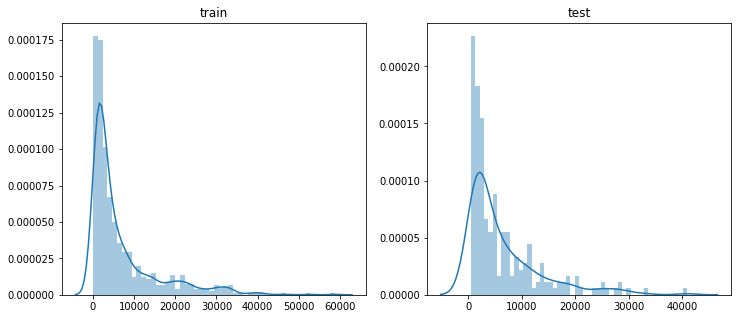

In [0]:
# 예측한 데이터를 시각화 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

**LSTM**

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [0]:
X_train.shape
X_train = np.reshape(X_train, (892,1,1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

regressor = Sequential()

regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

Using TensorFlow backend.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










In [0]:
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (224, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

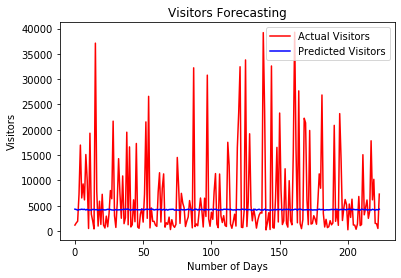

In [0]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Actual Visitors')
plt.plot(y_pred, color = 'blue', label = 'Predicted Visitors')
plt.title('Visitors Forecasting')
plt.xlabel('Number of Days')
plt.ylabel('Visitors')
plt.legend()
plt.show()

**MLP**

In [0]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt    
import seaborn as sns

In [0]:
#y = data.pop('m_total')
X = data

X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)

y_train = np.reshape(y_train.values,(-1,1))
X_train = np.reshape(X_train.values,(-1,1))
y_test = np.reshape(y_test.values,(-1,1))
X_test = np.reshape(X_test.values,(-1,1))

In [0]:
model = MLPClassifier()
model.fit(X_train, y_train)
print()
print(model)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [0]:
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

In [0]:
# summarize the fit of the model
print()
print(metrics.classification_report(expected_y, predicted_y))
print()
print(metrics.confusion_matrix(expected_y, predicted_y))


              precision    recall  f1-score   support

         222       0.00      0.00      0.00       1.0
         300       0.00      0.00      0.00       1.0
         338       0.00      0.00      0.00       1.0
         356       0.00      0.00      0.00       1.0
         357       0.00      0.00      0.00       1.0
         369       0.00      0.00      0.00       1.0
         382       0.00      0.00      0.00       1.0
         422       0.00      0.00      0.00       1.0
         456       0.00      0.00      0.00       1.0
         479       0.00      0.00      0.00       1.0
         480       0.00      0.00      0.00       1.0
         488       0.00      0.00      0.00       1.0
         493       0.00      0.00      0.00       1.0
         499       0.00      0.00      0.00       1.0
         520       0.00      0.00      0.00       1.0
         523       0.00      0.00      0.00       1.0
         529       0.00      0.00      0.00       0.0
         585       0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


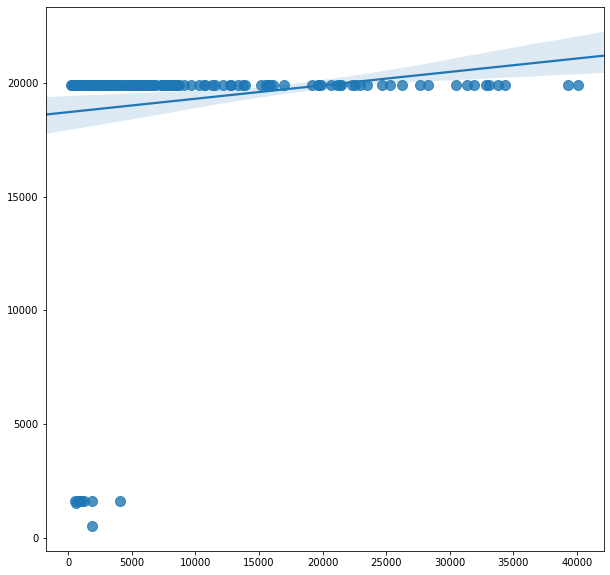

In [0]:
plt.figure(figsize=(10,10))    
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

**MLP regressor**

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(76029956.00505468, -0.06608569453932867)

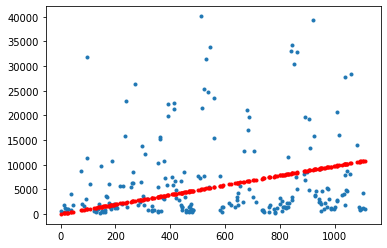

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=16)

#mlp = MLPRegressor(random_state=0, activation='tanh', hidden_layer_sizes=(16,8))

mlp.fit(X_train, y_train)

Y_guess = mlp.predict(X_test)

plt.plot(X_test[:,0], y_test, '.')
plt.plot(X_test[:,0], Y_guess, 'r.')

mean_squared_error(y_test, Y_guess), r2_score(y_test, Y_guess)

**Deep learning nonlinear regression**

In [0]:
from sklearn import preprocessing
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import Sequential

model = Sequential()

# Input : 1d, hidden layer i with 128 neurons 
model.add(Dense(128, input_dim=1, activation='relu'))
# Dropout of 20% 
model.add(Dropout(.2))
model.add(Activation("linear"))

model.add(Dense(64, activation='relu'))
model.add(Activation("linear"))
# Hidden layer k with 64 neurons.
model.add(Dense(64, activation='relu'))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])

np.random.seed(3)
model.fit(X_train, y_train, nb_epoch=256, batch_size=2, verbose=2)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/256
 - 2s - loss: 83055926.8776 - acc: 0.0000e+00
Epoch 2/256
 - 2s - loss: 79775651.5790 - acc: 0.0000e+00
Epoch 3/256
 - 2s - loss: 80141087.3528 - acc: 0.0000e+00
Epoch 4/256
 - 2s - loss: 79015751.0900 - acc: 0.0000e+00
Epoch 5/256
 - 2s - loss: 80152401.3958 - acc: 0.0022
Epoch 6/256
 - 2s - loss: 79926900.2072 - acc: 0.0000e+00
Epoch 7/256
 - 2s - loss: 79465176.4096 - acc: 0.0000e+00
Epoch 8/256
 - 2s - loss: 80188664.0785 - acc: 0.0000e+00
Epoch 9/256
 - 2s - loss: 79924815.3174 - acc: 0.0011
Epoch 10/256
 - 2s - loss: 79936332.3886 - acc: 0.0000e+00
Epoch 11/256
 - 2s - loss: 79799647.5810 - acc: 0.0000e+00
Epoch 12/256
 - 2s - loss: 79379200.2975 - acc: 0.0000e+00
Epoch 13/256
 - 2s - loss: 80330442.6369 - acc: 0.0000e+00
Epoch 14/256
 - 2s - loss: 79493481.8010 - acc: 0.0000e+00
Epoch 15/256
 - 2s - loss: 79110886.9601 - acc: 0.0000e+00
Epoch 16/256
 - 2s - loss: 79697166.8663 - acc: 0.0000e+00
Epoch 17/256
 - 2s - loss: 79694573.4425 - acc: 0.0000e+00
Epoch 18/256
 

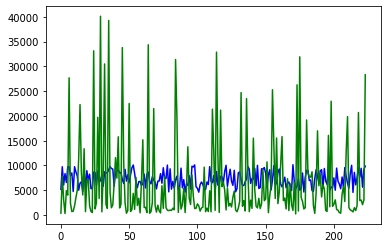

In [0]:
predicted = model.predict(X_test)

plt.plot(predicted, color="blue")
plt.plot(y_test, color="green")
plt.show()